# 종목명을 입력받으면 세부정보 반환

In [3]:
import requests

def get_stock_info(stock_name):
    # 발급받은 인코딩된 서비스키를 사용하세요.
    service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

    # 요청할 URL 구성 (종목명 추가)
    url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=1&pageNo=1&resultType=json&itmsNm={stock_name}"

    # API 요청을 보냅니다.
    response = requests.get(url)

    # 응답 상태 코드가 200일 경우 데이터 처리
    if response.status_code == 200:
        data = response.json()
        items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
        
        # 결과가 있을 경우
        if items:
            stock_data = items[0]  # 첫 번째 항목만 가져옴
            result = {
                "종목명": stock_data.get('itmsNm', 'N/A'),
                "종가": stock_data.get('clpr', 'N/A'),
                "전일 대비": stock_data.get('vs', 'N/A'),
                "등락률": stock_data.get('fltRt', 'N/A'),  # 등락률
                "시가": stock_data.get('mkp', 'N/A'),
                "고가": stock_data.get('hipr', 'N/A'),
                "저가": stock_data.get('lopr', 'N/A'),
                "거래량": stock_data.get('trqu', 'N/A'),
                "거래대금": stock_data.get('trPrc', 'N/A'),
                "시가총액": stock_data.get('mrktTotAmt', 'N/A')
            }
            return result
        else:
            return "해당 종목명을 찾을 수 없습니다."
    else:
        return f"API 호출 실패: {response.status_code}"

# 종목명을 입력받아 함수 호출
stock_name = input("조회할 종목명을 입력하세요: ")
stock_info = get_stock_info(stock_name)

# 결과 출력
if isinstance(stock_info, dict):
    for key, value in stock_info.items():
        print(f"{key}: {value}")
else:
    print(stock_info)

조회할 종목명을 입력하세요:  삼성전자


종목명: 삼성전자
종가: 53000
전일 대비: -2000
등락률: -3.64
시가: 54600
고가: 54600
저가: 53000
거래량: 37962881
거래대금: 2037790866499
시가총액: 316398475150000


In [4]:
stock_info.items()

dict_items([('종목명', '삼성전자'), ('종가', '53000'), ('전일 대비', '-2000'), ('등락률', '-3.64'), ('시가', '54600'), ('고가', '54600'), ('저가', '53000'), ('거래량', '37962881'), ('거래대금', '2037790866499'), ('시가총액', '316398475150000')])

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_31177/2531466339.py:43: UserWa

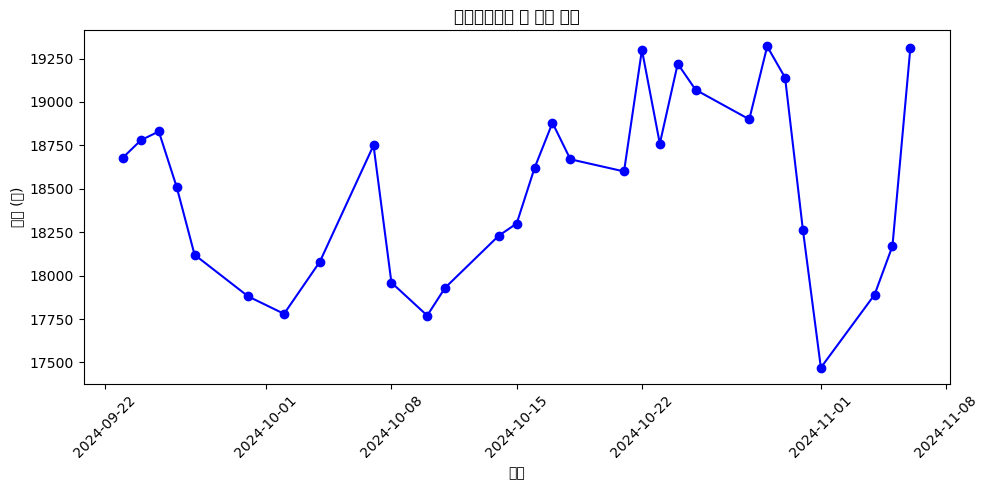

In [4]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# 발급받은 인코딩된 서비스키를 사용하세요.
service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

# 요청할 종목명 설정
stock_name = '한화시스템'

# 한 달(30일)치 데이터를 요청할 URL 구성
url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=30&pageNo=1&resultType=json&itmsNm={stock_name}"

# API 요청을 보냅니다.
response = requests.get(url)

# 응답 상태 코드가 200일 경우 데이터 출력
if response.status_code == 200:
    data = response.json()
    items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
    
    # 날짜와 종가 데이터를 저장할 리스트 초기화
    dates = []
    closing_prices = []
    
    # 각 날짜와 종가를 리스트에 저장
    for item in items:
        date = datetime.strptime(item.get('basDt'), '%Y%m%d')
        closing_price = float(item.get('clpr', 0))  # 종가
        dates.append(date)
        closing_prices.append(closing_price)
    
    # 날짜 순서로 정렬 (API에서 최신순으로 반환할 수 있으므로)
    dates, closing_prices = zip(*sorted(zip(dates, closing_prices)))
    
    # 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(dates, closing_prices, marker='o', linestyle='-', color='b')
    plt.title(f"{stock_name}의 한 달치 종가")
    plt.xlabel("날짜")
    plt.ylabel("종가 (원)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(f"API 호출 실패: {response.status_code}")

In [5]:
import requests
from datetime import datetime

# 발급받은 인코딩된 서비스키를 사용하세요.
service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

# 요청할 종목명 설정
stock_name = '한화시스템'

# 한 달(30일)치 데이터를 요청할 URL 구성
url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=30&pageNo=1&resultType=json&itmsNm={stock_name}"

# API 요청을 보냅니다.
response = requests.get(url)

# 응답 상태 코드가 200일 경우 데이터 출력
if response.status_code == 200:
    data = response.json()
    items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
    
    # 종가 데이터를 저장할 리스트 초기화
    closing_prices = []
    
    # 각 종가를 리스트에 저장
    for item in items:
        closing_price = float(item.get('clpr', 0))  # 종가
        closing_prices.append(closing_price)
    
    # 최신순으로 가져왔으므로 날짜 순서로 정렬
    closing_prices = closing_prices[::-1]  # 리스트 역순으로 정렬
    
    # 종가 리스트 출력
    print("한 달치 종가 리스트:", closing_prices)
else:
    print(f"API 호출 실패: {response.status_code}")

한 달치 종가 리스트: [18680.0, 18780.0, 18830.0, 18510.0, 18120.0, 17880.0, 17780.0, 18080.0, 18750.0, 17960.0, 17770.0, 17930.0, 18230.0, 18300.0, 18620.0, 18880.0, 18670.0, 18600.0, 19300.0, 18760.0, 19220.0, 19070.0, 18900.0, 19320.0, 19140.0, 18260.0, 17470.0, 17890.0, 18170.0, 19310.0]


# 180종가 리스트를 반환하는 함수

In [2]:
import requests
from datetime import datetime

def get_stock_prices_180_days(stock_name):
    # 발급받은 인코딩된 서비스키를 사용하세요.
    service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

    # 180일치 데이터를 요청할 URL 구성
    url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=180&pageNo=1&resultType=json&itmsNm={stock_name}"

    # API 요청을 보냅니다.
    response = requests.get(url)

    # 응답 상태 코드가 200일 경우 데이터 처리
    if response.status_code == 200:
        data = response.json()
        items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
        
        # 종가 데이터를 저장할 리스트 초기화
        closing_prices = []
        
        # 각 종가 데이터를 리스트에 저장
        for item in items:
            closing_price = float(item.get('clpr', 0))  # 종가
            closing_prices.append(closing_price)
        
        # 최신순으로 가져왔으므로 날짜 순서로 정렬
        closing_prices = closing_prices[::-1]  # 리스트 역순으로 정렬
        
        return closing_prices
    else:
        print(f"API 호출 실패: {response.status_code}")
        return None

# 종목명을 입력받아 함수 호출
stock_name = input("조회할 종목명을 입력하세요: ")
stock_prices_180_days = get_stock_prices_180_days(stock_name)

# 결과 출력
if stock_prices_180_days:
    print(f"{stock_name}의 180일치 종가 리스트:", stock_prices_180_days)

조회할 종목명을 입력하세요:  한미반도체


한미반도체의 180일치 종가 리스트: [75500.0, 75400.0, 74500.0, 74500.0, 71600.0, 76400.0, 73800.0, 77700.0, 82700.0, 90100.0, 84800.0, 95400.0, 94800.0, 101400.0, 98700.0, 100100.0, 97400.0, 98100.0, 100100.0, 98900.0, 96200.0, 98300.0, 93400.0, 93100.0, 93800.0, 93800.0, 97400.0, 112500.0, 114400.0, 134000.0, 133700.0, 142300.0, 145500.0, 144900.0, 137300.0, 135700.0, 132500.0, 132900.0, 141700.0, 145500.0, 146300.0, 140300.0, 136300.0, 142600.0, 136400.0, 127100.0, 131400.0, 142600.0, 136500.0, 137200.0, 137100.0, 135000.0, 133000.0, 130000.0, 136500.0, 140800.0, 141600.0, 139100.0, 139700.0, 141800.0, 144100.0, 139900.0, 141300.0, 140200.0, 147300.0, 146400.0, 147700.0, 152200.0, 163000.0, 169200.0, 165300.0, 161700.0, 146700.0, 148600.0, 155800.0, 156800.0, 160000.0, 159300.0, 173900.0, 189000.0, 179900.0, 180100.0, 179500.0, 177000.0, 179300.0, 180300.0, 175400.0, 172900.0, 179800.0, 173700.0, 172300.0, 170800.0, 168600.0, 166800.0, 160200.0, 165400.0, 162500.0, 164100.0, 162400.0, 161000.0, 16

# 세부정보와 종가리스트를 함께 반환하는 함수.

조회할 종목명을 입력하세요:  두산


종목명: 두산
종가: 234000
전일 대비: -500
등락률: -.21
시가: 233000
고가: 244000
저가: 230500
거래량: 105283
거래대금: 24962493000
시가총액: 3866577390000
180일 종가 리스트: [93600.0, 92600.0, 98000.0, 98100.0, 98700.0, 99200.0, 99900.0, 95900.0, 90600.0, 91700.0, 91000.0, 91100.0, 90700.0, 92400.0, 107900.0, 111200.0, 109000.0, 115200.0, 128600.0, 134000.0, 145000.0, 162000.0, 142100.0, 145800.0, 150600.0, 147000.0, 143800.0, 145600.0, 149900.0, 151000.0, 155500.0, 145000.0, 144000.0, 138000.0, 147700.0, 141800.0, 143600.0, 148500.0, 151800.0, 164000.0, 156100.0, 140400.0, 139400.0, 141000.0, 131700.0, 133400.0, 132900.0, 137000.0, 135000.0, 137600.0, 146100.0, 152300.0, 146100.0, 154200.0, 160000.0, 160000.0, 162200.0, 161300.0, 170400.0, 162900.0, 174700.0, 165000.0, 162800.0, 164000.0, 177400.0, 193400.0, 189700.0, 206500.0, 220000.0, 210500.0, 204000.0, 206000.0, 200000.0, 195500.0, 199000.0, 206000.0, 201000.0, 202000.0, 223000.0, 234000.0, 216500.0, 219000.0, 225500.0, 221500.0, 213500.0, 212500.0, 203000.0, 206500

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_63948/1187847516.py:63: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_63948/1187847516.py:63: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_63948/1187847516.py:63: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_63948/1187847516.py:63: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_63948/1187847516.py:63: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  plt.tight_layout()
/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_63948/1187847516.py:63: UserWarn

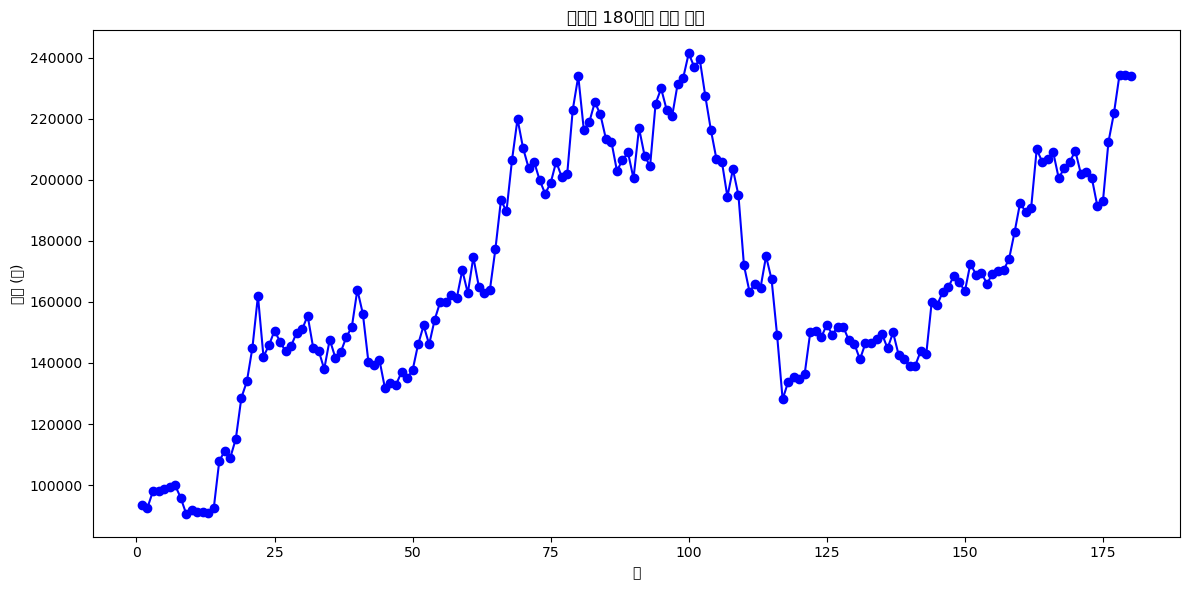

In [18]:
import requests
from datetime import datetime
import matplotlib.pyplot as plt

def get_stock_data_with_180_days(stock_name):
    # 발급받은 인코딩된 서비스키를 사용하세요.
    service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

    # 180일치 데이터를 요청할 URL 구성
    url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=180&pageNo=1&resultType=json&itmsNm={stock_name}"

    # API 요청을 보냅니다.
    response = requests.get(url)

    # 응답 상태 코드가 200일 경우 데이터 처리
    if response.status_code == 200:
        data = response.json()
        items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
        
        if not items:
            return "해당 종목명을 찾을 수 없습니다."

        # 종목 기본 정보 (첫 번째 항목)
        stock_data = items[0]
        result = {
            "종목명": stock_data.get('itmsNm', 'N/A'),
            "종가": stock_data.get('clpr', 'N/A'),
            "전일 대비": stock_data.get('vs', 'N/A'),
            "등락률": stock_data.get('fltRt', 'N/A'),
            "시가": stock_data.get('mkp', 'N/A'),
            "고가": stock_data.get('hipr', 'N/A'),
            "저가": stock_data.get('lopr', 'N/A'),
            "거래량": stock_data.get('trqu', 'N/A'),
            "거래대금": stock_data.get('trPrc', 'N/A'),
            "시가총액": stock_data.get('mrktTotAmt', 'N/A')
        }
        
        # 180일치 종가 리스트
        closing_prices = []
        for item in items:
            closing_price = float(item.get('clpr', 0))  # 종가
            closing_prices.append(closing_price)
        
        # 날짜 순서대로 정렬
        closing_prices = closing_prices[::-1]  # 최신순에서 날짜순으로 정렬

        # 180일치 종가 리스트 추가
        result["180일 종가 리스트"] = closing_prices
        
        return result
    else:
        return f"API 호출 실패: {response.status_code}"

def plot_stock_prices(closing_prices, stock_name):
    # 날짜는 1일부터 180일 까지의 범위로 설정
    days = range(1, len(closing_prices) + 1)
    
    plt.figure(figsize=(12, 6))
    plt.plot(days, closing_prices, marker='o', linestyle='-', color='b')
    plt.title(f"{stock_name}의 180일치 종가 변동")
    plt.xlabel("일")
    plt.ylabel("종가 (원)")
    plt.tight_layout()
    plt.show()

# 종목명을 입력받아 함수 호출
stock_name = input("조회할 종목명을 입력하세요: ")
stock_info = get_stock_data_with_180_days(stock_name)

# 결과 출력 및 그래프 그리기
if isinstance(stock_info, dict):
    for key, value in stock_info.items():
        print(f"{key}: {value}")
    plot_stock_prices(stock_info["180일 종가 리스트"], stock_name)
else:
    print(stock_info)

# 360일 종가 리스트 출력 함수

In [16]:
import requests
from datetime import datetime

def get_stock_prices_360_days(stock_name):
    # 발급받은 인코딩된 서비스키를 사용하세요.
    service_key = 'Q0KvEVbeB1hi3GV3FuOvbdn%2FWJGeUcU6TTTo3x3sQSvfSH5JzLuvrzDT3hUYfN6%2F3jdXnJw1VQfFSZvEBnVuFQ%3D%3D'

    # 360일치 데이터를 요청할 URL 구성
    url = f"https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey={service_key}&numOfRows=360&pageNo=1&resultType=json&itmsNm={stock_name}"

    # API 요청을 보냅니다.
    response = requests.get(url)

    # 응답 상태 코드가 200일 경우 데이터 처리
    if response.status_code == 200:
        data = response.json()
        items = data.get('response', {}).get('body', {}).get('items', {}).get('item', [])
        
        # 종가 데이터를 저장할 리스트 초기화
        closing_prices = []
        
        # 각 종가 데이터를 리스트에 저장
        for item in items:
            closing_price = float(item.get('clpr', 0))  # 종가
            closing_prices.append(closing_price)
        
        # 최신순으로 가져왔으므로 날짜 순서로 정렬
        closing_prices = closing_prices[::-1]  # 리스트 역순으로 정렬
        
        return closing_prices
    else:
        print(f"API 호출 실패: {response.status_code}")
        return None

# 종목명을 입력받아 함수 호출
stock_name = input("조회할 종목명을 입력하세요: ")
stock_prices_360_days = get_stock_prices_360_days(stock_name)

# 결과 출력
if stock_prices_360_days:
    print(f"{stock_name}의 360일치 종가 리스트:", stock_prices_360_days)

조회할 종목명을 입력하세요:  삼성전자


삼성전자의 360일치 종가 리스트: [68500.0, 68400.0, 68500.0, 68800.0, 70300.0, 72300.0, 71400.0, 70900.0, 72200.0, 71700.0, 71000.0, 70900.0, 72000.0, 71000.0, 72000.0, 71900.0, 71500.0, 71800.0, 71200.0, 71400.0, 70500.0, 71300.0, 71600.0, 72400.0, 72600.0, 72700.0, 72400.0, 72200.0, 73000.0, 73000.0, 72000.0, 71600.0, 69900.0, 69500.0, 71500.0, 71900.0, 71900.0, 73400.0, 73300.0, 72000.0, 71700.0, 71000.0, 70300.0, 70400.0, 70000.0, 69800.0, 71700.0, 70600.0, 69800.0, 71100.0, 69900.0, 68800.0, 68300.0, 68500.0, 67600.0, 68900.0, 68000.0, 67500.0, 67300.0, 67000.0, 66700.0, 66300.0, 66600.0, 66600.0, 67100.0, 68200.0, 67100.0, 66800.0, 66800.0, 67100.0, 66900.0, 71000.0, 71200.0, 70700.0, 70000.0, 70400.0, 70300.0, 70800.0, 70500.0, 70900.0, 71700.0, 72000.0, 70200.0, 69800.0, 69600.0, 68900.0, 68800.0, 69400.0, 68600.0, 68400.0, 67500.0, 66700.0, 66000.0, 66400.0, 68200.0, 68900.0, 68000.0, 67300.0, 69400.0, 70500.0, 69500.0, 68800.0, 68400.0, 68500.0, 68000.0, 66700.0, 67300.0, 67300.0, 66900.0

Epoch 1/10


2024-11-12 17:51:45.168608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:51:45.518596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:51:45.807450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:51:46.100170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:51:46.414004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:51:46.774526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:51:48.067616: I tensorflow/core/grappler/optimizers/cust

300/300 [==============================] - 29s 69ms/step - loss: 0.0200
Epoch 2/10
300/300 [==============================] - 21s 69ms/step - loss: 0.0077
Epoch 3/10
300/300 [==============================] - 20s 67ms/step - loss: 0.0068
Epoch 4/10
300/300 [==============================] - 21s 70ms/step - loss: 0.0070
Epoch 5/10
300/300 [==============================] - 21s 71ms/step - loss: 0.0050
Epoch 6/10
300/300 [==============================] - 22s 72ms/step - loss: 0.0041
Epoch 7/10
300/300 [==============================] - 21s 72ms/step - loss: 0.0035
Epoch 8/10
300/300 [==============================] - 21s 69ms/step - loss: 0.0036
Epoch 9/10
300/300 [==============================] - 20s 67ms/step - loss: 0.0028
Epoch 10/10
300/300 [==============================] - 20s 68ms/step - loss: 0.0026


2024-11-12 17:55:20.328905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:55:20.480006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:55:20.771058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:55:21.072357: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 17:55:21.367754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 2s 2s/step
예측된 내일 종가: 93903.65625


/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ohheungchan/anaconda3/envs/tf29_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: 

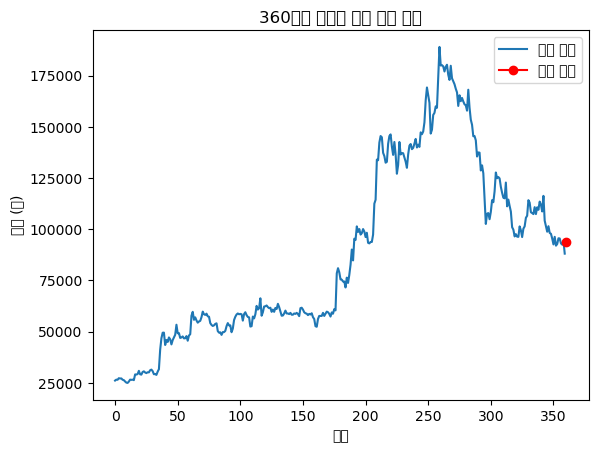

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

# 이미 생성된 360일치 종가 리스트가 있다고 가정
closing_prices = stock_prices_360_days  # 360일치 종가 리스트를 여기에 넣으세요.

# 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.array(closing_prices).reshape(-1, 1))

# 학습 데이터 생성 (60일 데이터로 다음날을 예측)
sequence_length = 60
x_train, y_train = [], []

for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# LSTM 모델 구성
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50, return_sequences=False),
    Dense(units=30),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=10)

# 다음날 예측하기 위한 입력 데이터 생성 (마지막 60일 데이터)
last_60_days = scaled_data[-sequence_length:]
X_test = np.reshape(last_60_days, (1, sequence_length, 1))

# 예측 및 스케일 복원
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"예측된 내일 종가: {predicted_price[0][0]}")

# 그래프로 예측 결과 시각화
plt.plot(closing_prices, label="실제 종가")
plt.plot(range(len(closing_prices), len(closing_prices) + 1), predicted_price, marker='o', color='r', label="예측 종가")
plt.legend()
plt.title("360일치 종가와 내일 예측 종가")
plt.xlabel("날짜")
plt.ylabel("종가 (원)")
plt.show()

# 주가예측 함수
- 앞서 알아본 180일 종가 리스트를 인자로 넣는다.

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

def predict_next_day_price(closing_prices):
    # 데이터 전처리
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(np.array(closing_prices).reshape(-1, 1))

    # 학습 데이터 생성 (60일 데이터로 다음날을 예측)
    sequence_length = 60
    x_train, y_train = [], []

    for i in range(sequence_length, len(scaled_data)):
        x_train.append(scaled_data[i-sequence_length:i, 0])
        y_train.append(scaled_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # LSTM 모델 구성
    model = Sequential([
        LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
        LSTM(units=50, return_sequences=False),
        Dense(units=25),
        Dense(units=1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

    # 다음날 예측하기 위한 입력 데이터 생성 (마지막 60일 데이터)
    last_60_days = scaled_data[-sequence_length:]
    X_test = np.reshape(last_60_days, (1, sequence_length, 1))

    # 예측 및 스케일 복원
    predicted_price = model.predict(X_test)
    predicted_price = scaler.inverse_transform(predicted_price)

    return predicted_price[0][0]


Epoch 1/10


2024-11-12 18:10:11.846599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:10:12.025952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:10:12.322420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:10:12.658319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:10:13.919803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 15s 36ms/step - loss: 0.0145
Epoch 2/10
300/300 [==============================] - 11s 35ms/step - loss: 0.0056
Epoch 3/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0054
Epoch 4/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0040
Epoch 5/10
300/300 [==============================] - 10s 35ms/step - loss: 0.0032
Epoch 6/10
300/300 [==============================] - 11s 36ms/step - loss: 0.0036
Epoch 7/10
300/300 [==============================] - 10s 34ms/step - loss: 0.0032
Epoch 8/10
300/300 [==============================] - 11s 37ms/step - loss: 0.0029
Epoch 9/10
300/300 [==============================] - 11s 36ms/step - loss: 0.0026
Epoch 10/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0027


2024-11-12 18:11:59.784272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:11:59.859365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:12:00.171808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 966ms/step
예측된 내일 종가: 55900.9453125


In [19]:
# 예측 실행
predicted_price = predict_next_day_price(stock_prices_360_days)
print(f"예측된 내일 종가: {predicted_price}")

Epoch 1/10


2024-11-12 18:30:23.918587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:30:24.116032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:30:24.425272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:30:24.806199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:30:26.137176: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


300/300 [==============================] - 15s 33ms/step - loss: 0.0134
Epoch 2/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0058
Epoch 3/10
300/300 [==============================] - 10s 32ms/step - loss: 0.0053
Epoch 4/10
300/300 [==============================] - 10s 32ms/step - loss: 0.0040
Epoch 5/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0039
Epoch 6/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0029
Epoch 7/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0034
Epoch 8/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0027
Epoch 9/10
300/300 [==============================] - 10s 33ms/step - loss: 0.0023
Epoch 10/10
300/300 [==============================] - 10s 32ms/step - loss: 0.0025


2024-11-12 18:32:05.764847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:32:05.836285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:32:06.119813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 925ms/step
예측된 내일 종가: 55781.51953125


In [3]:
import requests
from bs4 import BeautifulSoup

def get_sector_per(sector_code):
    # 네이버 금융 산업군 페이지 URL
    url = f"https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no={sector_code}"

    # 요청 보내기
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)

    # 응답 상태 코드 확인
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        
        # 산업군 평균 PER 찾기
        per_element = soup.find("td", class_="number", text="PER")
        if per_element:
            per_value = per_element.find_next_sibling("td").get_text(strip=True)
            return per_value
        else:
            return "PER 데이터를 찾을 수 없습니다."
    else:
        return f"요청 실패: {response.status_code}"

# 예시로 '반도체' 산업군 코드 입력 (업종 번호에 따라 다름)
sector_code = 1000  # 업종 번호는 산업군에 따라 다름, 네이버 금융에서 확인 필요
sector_per = get_sector_per(sector_code)
print(f"해당 산업군의 평균 PER: {sector_per}")

해당 산업군의 평균 PER: PER 데이터를 찾을 수 없습니다.


/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_68334/2988131853.py:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  per_element = soup.find("td", class_="number", text="PER")


In [2]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

def get_sector_per_with_selenium(sector_url):
    # Selenium 드라이버 설정
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    driver.get(sector_url)

    # 페이지가 로드될 때까지 대기
    time.sleep(3)

    try:
        # 평균 PER을 포함한 테이블 요소 찾기
        per_element = driver.find_element(By.XPATH, '//*[@id="contentarea_left"]/table[1]/tbody/tr[4]/td[2]')
        per_value = per_element.text
        print(f"산업군 평균 PER: {per_value}")
        return per_value
    except Exception as e:
        print("PER 값을 찾을 수 없습니다.", e)
        return None
    finally:
        driver.quit()

# 예시 URL (반도체 업종 페이지 URL 사용)
sector_url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=105"
get_sector_per_with_selenium(sector_url)

산업군 평균 PER: +4.88%


'+4.88%'